In [34]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [15]:
dados_tratados = pd.read_csv('dados_final.csv')
pd.set_option('display.max_columns', None)

In [16]:
dados_tratados

,Unnamed: 0,Conjuge,Dependentes,TelefoneFixo,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,PagamentoOnline,Churn
0,0,1,0,0,0.0,1.0,0.000000,0.0,0.0,0.0,1,0
1,1,0,0,1,1.0,0.0,1.000000,0.0,0.0,0.0,0,0
2,2,0,0,1,1.0,1.0,0.000000,0.0,0.0,0.0,1,1
3,3,0,0,0,1.0,0.0,1.000000,1.0,0.0,0.0,0,0
4,4,0,0,1,0.0,0.0,0.000000,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10343,10343,1,0,1,0.0,1.0,0.000000,0.0,0.0,0.0,1,1
10344,10344,0,0,1,0.0,0.0,0.000000,0.0,0.0,0.0,1,1
10345,10345,1,1,1,0.0,0.0,0.000000,0.0,0.0,0.0,1,1
10346,10346,0,0,1,1.0,1.0,0.448031,0.0,0.0,0.0,0,1


In [17]:
#dividindo os dados em caracteristicas e target
X = dados_tratados.drop('Churn', axis = 1)
y = dados_tratados['Churn']

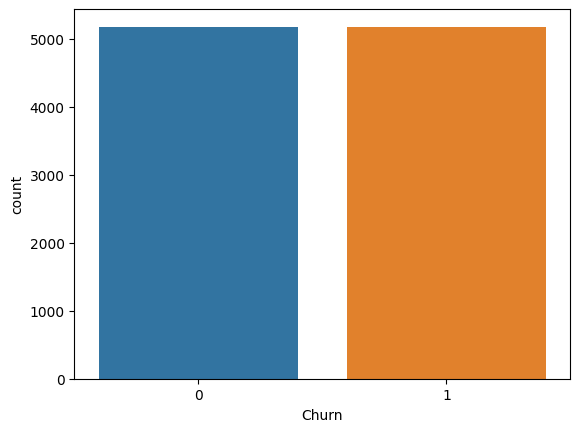

In [24]:
#verificação 2 - balanceamento
ax = sns.countplot(x='Churn', data=dados_tratados)

In [26]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state=123)

In [27]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state= 42)

In [28]:
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [29]:
#verificar a importância de cada atributo
dtc.feature_importances_

array([0.83726755, 0.01361228, 0.01976883, 0.01035252, 0.02019705,
       0.01683255, 0.01873182, 0.01755401, 0.01436462, 0.01195039,
       0.01936838])

In [30]:
predito_ArvoreDecisao = dtc.predict(X_teste)

In [31]:
predito_ArvoreDecisao

array([0, 0, 0, ..., 1, 0, 1])

In [32]:
dtc.score(X_teste, y_teste)

0.77487922705314

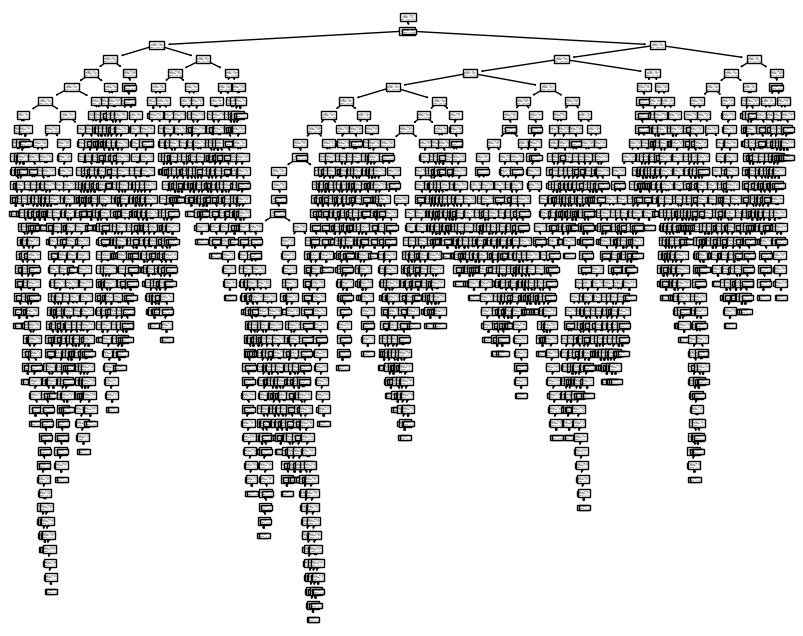

In [38]:
plt.figure(figsize = (10, 8))
tree.plot_tree(dtc)
plt.show()